In [ ]:
# Adicionar um índice de tempo para os dados
river_flows_data['Year'] = pd.date_range(start='1878', periods=len(river_flows_data), freq='A')
river_flows_data.set_index('Year', inplace=True)

# Plotar a série temporal
plt.figure(figsize=(12, 6))
plt.plot(river_flows_data.index, river_flows_data['Flow'], marker='o', linestyle='-')
plt.title('Annual River Flows')
plt.xlabel('Year')
plt.ylabel('Flow (megalitres)')
plt.grid(True)
plt.show()

In [2]:
#análises de autocorrelação e autocorrelação
#identificação das características como sazonalidade, tendência, ruído branco, random walk, lags 
#série temporal river_flows_data
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller


In [5]:
# Carregar os dados da série temporal
file_path = 'C:\\Users\\eliz1\\Desktop\\cesarSschool2024\\SeriesTemporais\\atividade_1_ElizaneaCampelo\\coloradoRiver.txt'
river_flows_data = pd.read_csv(file_path, header=None, names=['Flow'])
print(river_flows_data.head())

   Flow
0  0.46
1  0.53
2  1.24
3  1.48
4  3.69


In [6]:
river_flows_data = river_flows_data.iloc[:len(river_flows_data)-102]

In [7]:
start_year = 1878  # Defina o ano de início dos seus dados
end_year = start_year + len(river_flows_data) - 1
index = pd.Index(range(start_year, end_year + 1), name='Year')




In [8]:
river_flows_data.set_index(index, inplace=True)

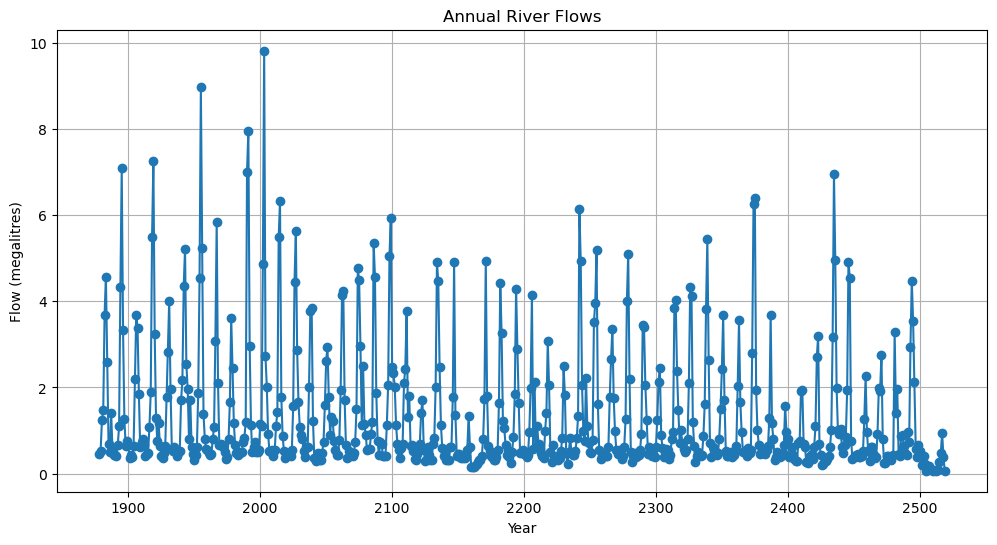

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(river_flows_data.index, river_flows_data['Flow'], marker='o', linestyle='-')
plt.title('Annual River Flows')
plt.xlabel('Year')
plt.ylabel('Flow (megalitres)')
plt.grid(True)
plt.show()

In [10]:
desc_stats = river_flows_data.describe()
print(desc_stats)

             Flow
count  642.000000
mean     1.294735
std      1.466259
min      0.070000
25%      0.430000
50%      0.630000
75%      1.617500
max      9.810000


c:\Users\eliz1\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


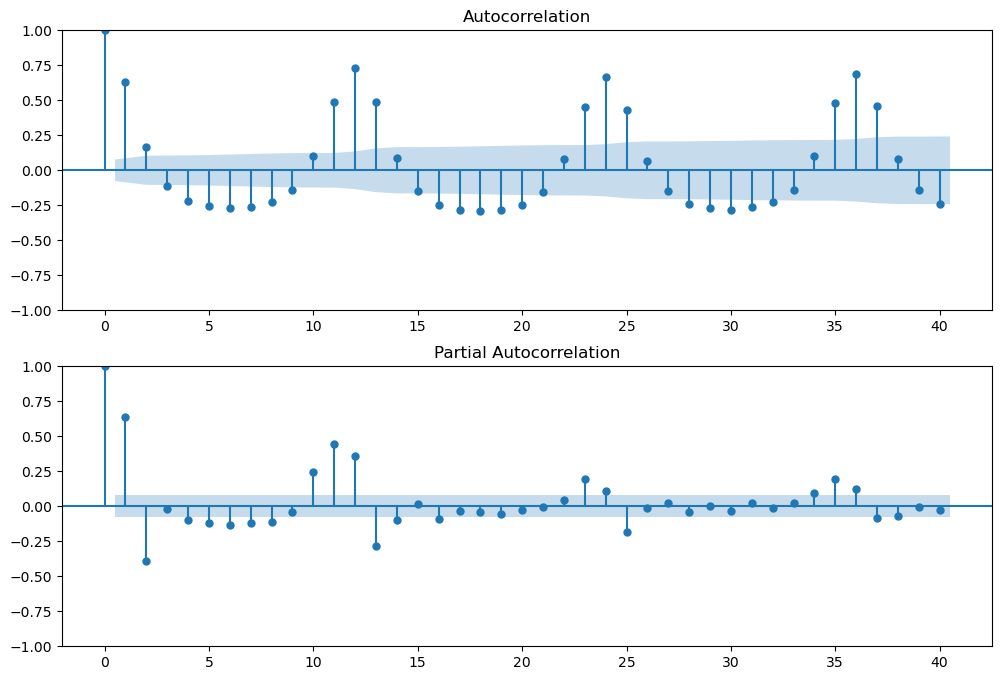

In [11]:
# Plotar ACF e PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(river_flows_data['Flow'], lags=40, ax=ax[0])
plot_pacf(river_flows_data['Flow'], lags=40, ax=ax[1])
plt.show()

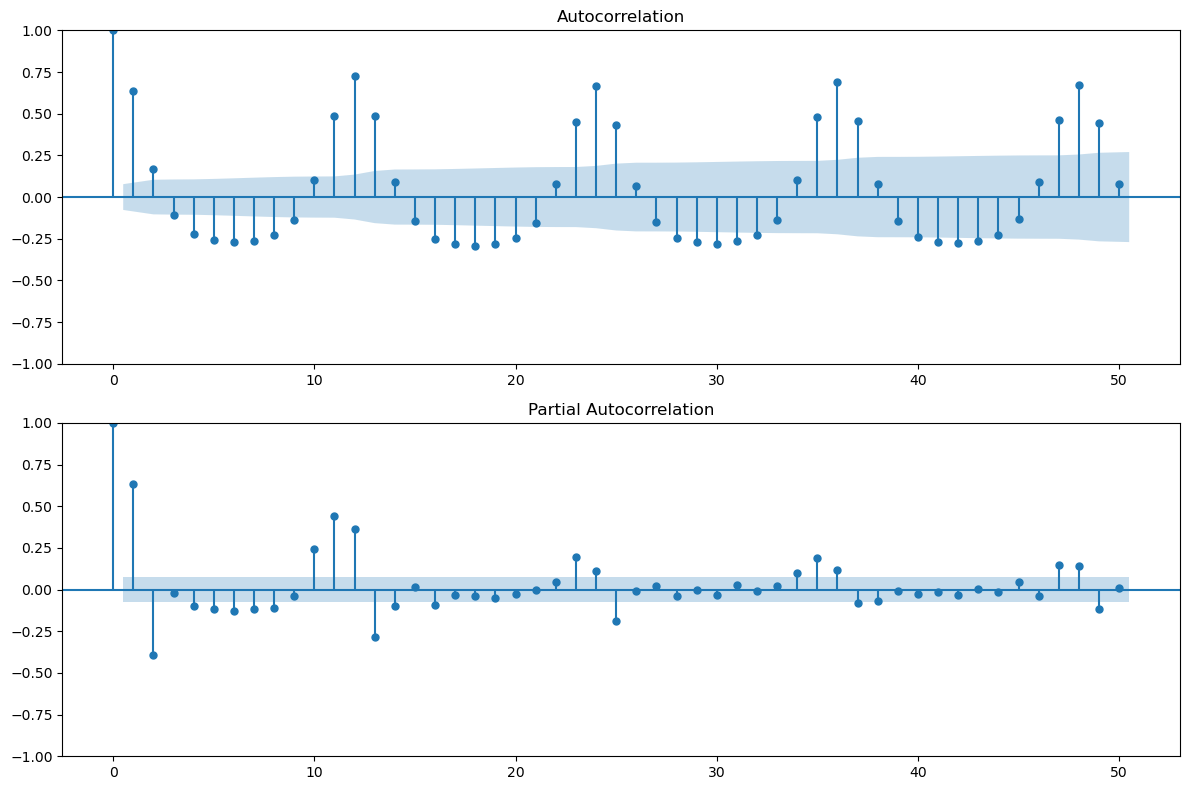

In [12]:
# Plotar ACF e PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(river_flows_data['Flow'], ax=ax[0], lags=50)
plot_pacf(river_flows_data['Flow'], ax=ax[1], lags=50)

plt.tight_layout()
plt.show()


Teste ADF para estacionariedade

In [14]:
result = adfuller(river_flows_data['Flow'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')



ADF Statistic: -4.597689230890954
p-value: 0.00013044235374954277
Critical Values:
   1%, -3.4408393249134326
Critical Values:
   5%, -2.86616806030903
Critical Values:
   10%, -2.569234676071002
